In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
plot_confusion_matrix

In [2]:
reviewsdf = pd.read_csv('data/reviews.csv')
profilesdf = pd.read_csv('data/profiles.csv')
animesdf = pd.read_csv('data/animes.csv')

In [3]:
reviewsdf.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link'], dtype='object')

In [4]:
profilesdf.columns

Index(['profile', 'gender', 'birthday', 'favorites_anime', 'link'], dtype='object')

In [5]:
animesdf.columns

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

In [6]:
mergedf1 = pd.merge(reviewsdf, animesdf, 
                   on='uid', 
                   how='outer')
print(mergedf1)

           uid         profile  anime_uid  \
0       255938  DesolatePsyche    34096.0   
1       255938  DesolatePsyche    34096.0   
2       259117       baekbeans    34599.0   
3       259117       baekbeans    34599.0   
4       253664            skrn    28891.0   
...        ...             ...        ...   
204577   27829             NaN        NaN   
204578    2649             NaN        NaN   
204579    8676             NaN        NaN   
204580   36043             NaN        NaN   
204581   33082             NaN        NaN   

                                                     text  score_x  \
0       \n           \n         \n           \n       ...      8.0   
1       \n           \n         \n           \n       ...      8.0   
2       \n           \n         \n           \n       ...     10.0   
3       \n           \n         \n           \n       ...     10.0   
4       \n           \n         \n           \n       ...      7.0   
...                                    

In [7]:
dfmerge = pd.DataFrame(data=mergedf1)
dfmerge

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_y,img_url,link_y
0,255938,DesolatePsyche,34096.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255938,DesolatePsyche,34096.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,259117,baekbeans,34599.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,259117,baekbeans,34599.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,253664,skrn,28891.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204577,27829,NaN,NaN,NaN,NaN,NaN,NaN,Heavy Object,"In the distant future, the nature of war has c...","['Action', 'Military', 'Sci-Fi', 'Mecha']","Oct 3, 2015 to Mar 26, 2016",24.0,111872.0,1008.0,2367.0,7.34,https://cdn.myanimelist.net/images/anime/13/75...,https://myanimelist.net/anime/27829/Heavy_Object
204578,2649,NaN,NaN,NaN,NaN,NaN,NaN,Doraemon: Obaachan no Omoide,Nobita misses his granny that died a few years...,"['Comedy', 'Fantasy', 'Kids', 'Sci-Fi', 'Shoun...","Mar 4, 2000",1.0,1481.0,8667.0,2183.0,7.38,https://cdn.myanimelist.net/images/anime/6/274...,https://myanimelist.net/anime/2649/Doraemon__O...
204579,8676,NaN,NaN,NaN,NaN,NaN,NaN,Amagami SS,"Two years ago, Junichi Tachibana had a date on...","['Slice of Life', 'Comedy', 'Romance', 'School']","Jul 2, 2010 to Dec 24, 2010",25.0,240377.0,417.0,1885.0,7.45,https://cdn.myanimelist.net/images/anime/10/78...,https://myanimelist.net/anime/8676/Amagami_SS
204580,36043,NaN,NaN,NaN,NaN,NaN,NaN,Net-juu no Susume Special,An unaired 11th episode included with the Blu-...,"['Game', 'Comedy', 'Romance']","Dec 8, 2017",1.0,62448.0,1630.0,1802.0,7.48,https://cdn.myanimelist.net/images/anime/7/901...,https://myanimelist.net/anime/36043/Net-juu_no...


In [8]:
dfmerge.isnull().sum().sum()

2064198

In [9]:
dfmerge.all()

uid            True
profile        True
anime_uid      True
text           True
score_x       False
scores         True
link_x         True
title          True
synopsis       True
genre          True
aired          True
episodes       True
members        True
popularity     True
ranked         True
score_y        True
img_url        True
link_y         True
dtype: bool

In [10]:
cleandf = dfmerge.dropna()
cleandf

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_y,img_url,link_y
74,29323,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...
75,29323,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...
116,30968,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,100.0,15323.0,12764.0,6.70,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...
117,30968,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,100.0,15323.0,12764.0,6.70,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...
192,37548,vanmarckestevy,9563.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '8...",https://myanimelist.net/reviews.php?id=37548,Metroid Short Animation,A fan-made animation of the Metroid franchis...,['Sci-Fi'],"Jun 6, 2016",1.0,248.0,12698.0,8481.0,5.96,https://cdn.myanimelist.net/images/anime/1285/...,https://myanimelist.net/anime/37548/Metroid_Sh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194088,35975,DangoSage,10033.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '8', 'Animation': '7...",https://myanimelist.net/reviews.php?id=35975,"Hope: Suiso Shakai to, Korekara no Energy no H...",A Toyota commissioned commercial explaining ...,['Slice of Life'],"Nov 17, 2014",1.0,293.0,12219.0,10943.0,4.95,https://cdn.myanimelist.net/images/anime/2/869...,https://myanimelist.net/anime/35975/Hope__Suis...
194105,10901,chidori3souske,2593.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '8', 'Animation': '1...",https://myanimelist.net/reviews.php?id=10901,Aoi Hitomi no Onnanoko no Ohanashi,The story is set in a village in the southern ...,"['Drama', 'Historical']","Aug 13, 2009",1.0,509.0,10963.0,7230.0,6.26,https://cdn.myanimelist.net/images/anime/5/300...,https://myanimelist.net/anime/10901/Aoi_Hitomi...
194108,34734,Akuteru,2593.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '10', 'Animation': '...",https://myanimelist.net/reviews.php?id=34734,Minami Kamakura Koukou Joshi Jitenshabu: Kita ...,Unaired episode included with the special edit...,"['Sports', 'School', 'Shounen']","May 15, 2017",1.0,2750.0,7197.0,6128.0,6.49,https://cdn.myanimelist.net/images/anime/5/837...,https://myanimelist.net/anime/34734/Minami_Kam...
194117,5909,Raptor73,2593.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=5909,Seitokai no Ichizon,Imagine living life as the vice president of t...,"['Harem', 'Comedy', 'Parody', 'School']","Oct 3, 2009 to Dec 19, 2009",12.0,150251.0,738.0,2077.0,7.41,https://cdn.myanimelist.net/images/anime/7/196...,https://myanimelist.net/anime/5909/Seitokai_no...


In [11]:
cleandf.isnull().sum().sum()

0

In [12]:
allmerge = pd.merge(cleandf, profilesdf, 
                   on='profile', 
                   how='outer')
print(allmerge)

            uid          profile  anime_uid  \
0       29323.0    Slushpuppy282     7588.0   
1       29323.0    Slushpuppy282     7588.0   
2       29323.0    Slushpuppy282     7588.0   
3       29323.0    Slushpuppy282     7588.0   
4       30968.0      ParaParaJMo     1253.0   
...         ...              ...        ...   
100888      NaN       daniel1302        NaN   
100889      NaN       bridgesams        NaN   
100890      NaN    Officer_Anime        NaN   
100891      NaN             Yuez        NaN   
100892      NaN  srry4apologizng        NaN   

                                                     text  score_x  \
0       \n           \n         \n           \n       ...      7.0   
1       \n           \n         \n           \n       ...      7.0   
2       \n           \n         \n           \n       ...      7.0   
3       \n           \n         \n           \n       ...      7.0   
4       \n           \n         \n           \n       ...      9.0   
...            

In [13]:
allmergedf = pd.DataFrame(data=allmerge)
allmergedf

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,...,members,popularity,ranked,score_y,img_url,link_y,gender,birthday,favorites_anime,link
0,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
1,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
2,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
3,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.9,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
4,30968.0,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",...,100.0,15323.0,12764.0,6.7,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",https://myanimelist.net/profile/ParaParaJMo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100888,NaN,daniel1302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],https://myanimelist.net/profile/daniel1302
100889,NaN,bridgesams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,"Jan 1, 2001","['37510', '35180', '30', '31043', '5081', '374...",https://myanimelist.net/profile/bridgesams
100890,NaN,Officer_Anime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],https://myanimelist.net/profile/Officer_Anime
100891,NaN,Yuez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],https://myanimelist.net/profile/Yuez


In [14]:
allmergedf.isnull().sum().sum()

1347096

In [15]:
mergeddf = allmergedf.dropna()
mergeddf['scores'].value_counts().sum()

18429

In [16]:
mergeddf.isnull().sum().sum()

0

In [17]:
mergeddf

,uid,profile,anime_uid,text,score_x,scores,link_x,title,synopsis,genre,...,members,popularity,ranked,score_y,img_url,link_y,gender,birthday,favorites_anime,link
0,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
1,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
2,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
3,29323.0,Slushpuppy282,7588.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...",https://myanimelist.net/reviews.php?id=29323,"Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],...,360.0,11732.0,8664.0,5.90,https://cdn.myanimelist.net/images/anime/2/705...,https://myanimelist.net/anime/29323/Oyaji_no_I...,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",https://myanimelist.net/profile/Slushpuppy282
4,30968.0,ParaParaJMo,1253.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=30968,Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",...,100.0,15323.0,12764.0,6.70,https://cdn.myanimelist.net/images/anime/2/745...,https://myanimelist.net/anime/30968/Kokoro_no_...,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",https://myanimelist.net/profile/ParaParaJMo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25775,29103.0,Samurai_Wolf337,8676.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=29103,Tanoshii Sansuu,Music video for a song about arithmetic by Sei...,"['Music', 'Kids']",...,161.0,14104.0,10725.0,5.13,https://cdn.myanimelist.net/images/anime/5/701...,https://myanimelist.net/anime/29103/Tanoshii_S...,Male,"Jul 6, 1994","['356', '3588', '3342', '1575', '8074']",https://myanimelist.net/profile/Samurai_Wolf337
25776,13167.0,meri_nicole,5060.0,\n \n \n \n ...,9.0,"{'Overall': '9', 'Story': '8', 'Animation': '7...",https://myanimelist.net/reviews.php?id=13167,Zoobles!,The Candy Factory is a place where all Zoobles...,['Kids'],...,215.0,13177.0,14663.0,5.90,https://cdn.myanimelist.net/images/anime/4/368...,https://myanimelist.net/anime/13167/Zoobles,Female,Feb 25,"['205', '5060', '966', '2605']",https://myanimelist.net/profile/meri_nicole
25777,22745.0,samurai_gaz25,5060.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=22745,Brothers Conflict: Setsubou,Ema finds a special lamp that her father left ...,"['Harem', 'Romance', 'Shoujo']",...,16125.0,3558.0,5070.0,6.70,https://cdn.myanimelist.net/images/anime/3/591...,https://myanimelist.net/anime/22745/Brothers_C...,Female,"Aug 25, 1990","['1013',

In [18]:
mergeddf.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score_x', 'scores', 'link_x',
       'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score_y', 'img_url', 'link_y', 'gender',
       'birthday', 'favorites_anime', 'link'],
      dtype='object')

In [19]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              18429 non-null  float64
 1   profile          18429 non-null  object 
 2   anime_uid        18429 non-null  float64
 3   text             18429 non-null  object 
 4   score_x          18429 non-null  float64
 5   scores           18429 non-null  object 
 6   link_x           18429 non-null  object 
 7   title            18429 non-null  object 
 8   synopsis         18429 non-null  object 
 9   genre            18429 non-null  object 
 10  aired            18429 non-null  object 
 11  episodes         18429 non-null  float64
 12  members          18429 non-null  float64
 13  popularity       18429 non-null  float64
 14  ranked           18429 non-null  float64
 15  score_y          18429 non-null  float64
 16  img_url          18429 non-null  object 
 17  link_y      

In [20]:
mergeddf = mergeddf.drop(columns=['link', 'link_y', 'img_url', 'link_x', 'text'], axis=1)

In [21]:
mergeddf

,uid,profile,anime_uid,score_x,scores,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_y,gender,birthday,favorites_anime
0,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
1,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
2,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
3,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,360.0,11732.0,8664.0,5.90,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']"
4,30968.0,ParaParaJMo,1253.0,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,100.0,15323.0,12764.0,6.70,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25775,29103.0,Samurai_Wolf337,8676.0,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Tanoshii Sansuu,Music video for a song about arithmetic by Sei...,"['Music', 'Kids']","Feb 8, 1988",1.0,161.0,14104.0,10725.0,5.13,Male,"Jul 6, 1994","['356', '3588', '3342', '1575', '8074']"
25776,13167.0,meri_nicole,5060.0,9.0,"{'Overall': '9', 'Story': '8', 'Animation': '7...",Zoobles!,The Candy Factory is a place where all Zoobles...,['Kids'],"May 18, 2011 to Nov 16, 2011",26.0,215.0,13177.0,14663.0,5.90,Female,Feb 25,"['205', '5060', '966', '2605']"
25777,22745.0,samurai_gaz25,5060.0,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Brothers Conflict: Setsubou,Ema finds a special lamp that her father left ...,"['Harem', 'Romance', 'Shoujo']","Feb 26, 2014",1.0,16125.0,3558.0,5070.0,6.70,Female,"Aug 25, 1990","['1013', '2025', '4898', '5060']"
25778,22745.0,samurai_gaz25,5060.0,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Brothers Conflict: Setsubou,Ema finds a special lamp that her father left ...,"['Harem', 'Romance', 'Shoujo']","Feb 26, 2014",1.0,16125.0,3558.0,5070.0,6.70,Female,"Aug 25, 1990","['1013', '2025', '4898', '5060']"


In [22]:
mergeddf.scores[0]

"{'Overall': '7', 'Story': '7', 'Animation': '6', 'Sound': '9', 'Character': '6', 'Enjoyment': '0'}"

In [23]:
def scoreExtractor(df):
    Story = [string.split(',')[1].split(':')[1].replace("'",'') for string in df['scores']]
    Animation = [string.split(',')[2].split(':')[1].replace("'",'') for string in df['scores']]
    Sound = [string.split(',')[3].split(':')[1].replace("'",'') for string in df['scores']]
    Character = [string.split(',')[4].split(':')[1].replace("'",'') for string in df['scores']]
    Enjoyment = [string.split(',')[5].split(':')[1].replace("'",'').replace("}",'') for string in df['scores']]
    
    df['Story score'] = pd.Series(Story)
    df['Animation score'] = pd.Series(Animation)
    df['Sound score'] = pd.Series(Sound)
    df['Character score'] = pd.Series(Character)
    df['Enjoyment score'] = pd.Series(Enjoyment)
    
    return df

In [24]:
mergeddf = scoreExtractor(mergeddf)
mergeddf.head()

,uid,profile,anime_uid,score_x,scores,title,synopsis,genre,aired,episodes,...,ranked,score_y,gender,birthday,favorites_anime,Story score,Animation score,Sound score,Character score,Enjoyment score
0,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
1,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
2,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
3,29323.0,Slushpuppy282,7588.0,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5.9,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
4,30968.0,ParaParaJMo,1253.0,9.0,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,...,12764.0,6.7,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",9,9,9,9,9


In [25]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              18429 non-null  float64
 1   profile          18429 non-null  object 
 2   anime_uid        18429 non-null  float64
 3   score_x          18429 non-null  float64
 4   scores           18429 non-null  object 
 5   title            18429 non-null  object 
 6   synopsis         18429 non-null  object 
 7   genre            18429 non-null  object 
 8   aired            18429 non-null  object 
 9   episodes         18429 non-null  float64
 10  members          18429 non-null  float64
 11  popularity       18429 non-null  float64
 12  ranked           18429 non-null  float64
 13  score_y          18429 non-null  float64
 14  gender           18429 non-null  object 
 15  birthday         18429 non-null  object 
 16  favorites_anime  18429 non-null  object 
 17  Story score 

In [26]:
mergeddf[['Animation score', 'Story score', 'Sound score', 'Character score', 'Enjoyment score']] = mergeddf[['Animation score', 'Story score', 'Sound score', 'Character score', 'Enjoyment score']].fillna(mergeddf[['Animation score', 'Story score', 'Sound score', 'Character score', 'Enjoyment score']].median())

In [27]:
mergeddf['Story score'] = mergeddf['Story score'].astype(int)
mergeddf['Animation score'] = mergeddf['Animation score'].astype(int)
mergeddf['Sound score'] = mergeddf['Sound score'].astype(int)
mergeddf['Character score'] = mergeddf['Character score'].astype(int)
mergeddf['Enjoyment score'] = mergeddf['Enjoyment score'].astype(int)
mergeddf['score_y'] = mergeddf['score_y'].astype(int)

In [28]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 25780
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              18429 non-null  float64
 1   profile          18429 non-null  object 
 2   anime_uid        18429 non-null  float64
 3   score_x          18429 non-null  float64
 4   scores           18429 non-null  object 
 5   title            18429 non-null  object 
 6   synopsis         18429 non-null  object 
 7   genre            18429 non-null  object 
 8   aired            18429 non-null  object 
 9   episodes         18429 non-null  float64
 10  members          18429 non-null  float64
 11  popularity       18429 non-null  float64
 12  ranked           18429 non-null  float64
 13  score_y          18429 non-null  int32  
 14  gender           18429 non-null  object 
 15  birthday         18429 non-null  object 
 16  favorites_anime  18429 non-null  object 
 17  Story score 

In [29]:
mergeddf['score_x'].value_counts()

10.0    4684
9.0     4617
8.0     3362
7.0     2358
6.0     1373
5.0      837
4.0      436
3.0      411
2.0      223
1.0      128
Name: score_x, dtype: int64

In [30]:
mergeddf['score_y'].unique()

array([5, 6, 7, 4, 8, 3, 2, 9])

In [31]:
mergeddf['score_x'] = mergeddf['score_x'].astype(int)


In [32]:
mergeddf.head()

,uid,profile,anime_uid,score_x,scores,title,synopsis,genre,aired,episodes,...,ranked,score_y,gender,birthday,favorites_anime,Story score,Animation score,Sound score,Character score,Enjoyment score
0,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
1,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
2,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
3,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
4,30968.0,ParaParaJMo,1253.0,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,...,12764.0,6,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",9,9,9,9,9


In [33]:
mergeddf.head()

,uid,profile,anime_uid,score_x,scores,title,synopsis,genre,aired,episodes,...,ranked,score_y,gender,birthday,favorites_anime,Story score,Animation score,Sound score,Character score,Enjoyment score
0,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
1,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
2,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
3,29323.0,Slushpuppy282,7588.0,7,"{'Overall': '7', 'Story': '7', 'Animation': '6...","Oyaji no, Imo no Kamisama.",A man wanders into a liquor store and sees a f...,['Slice of Life'],"Dec 31, 2014",1.0,...,8664.0,5,Female,"Dec 10, 1990","['407', '3588', '177', '1604', '269']",7,6,9,6,0
4,30968.0,ParaParaJMo,1253.0,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",Kokoro no Catchball,An educational anime about the importance of h...,"['Kids', 'Sports']",2005,1.0,...,12764.0,6,Male,"Jun 24, 1984","['1362', '263', '81', '2402', '85', '37991']",9,9,9,9,9


## Target assignment




In [34]:
mergeddf['score_x'].value_counts()

10    4684
9     4617
8     3362
7     2358
6     1373
5      837
4      436
3      411
2      223
1      128
Name: score_x, dtype: int64

In [35]:
mergeddf['target'] = [1 if x >= 8 else 3 if x <= 4 else 2 for x in mergeddf['score_x']]

In [36]:
mergeddf['target'].value_counts()

1    12663
2     4568
3     1198
Name: target, dtype: int64

In [37]:
mergeddf['target'].value_counts()

1    12663
2     4568
3     1198
Name: target, dtype: int64

In [38]:
mergeddf.isnull().any()

uid                False
profile            False
anime_uid          False
score_x            False
scores             False
title              False
synopsis           False
genre              False
aired              False
episodes           False
members            False
popularity         False
ranked             False
score_y            False
gender             False
birthday           False
favorites_anime    False
Story score        False
Animation score    False
Sound score        False
Character score    False
Enjoyment score    False
target             False
dtype: bool

## OHE functions for smote

In [39]:
# Defined a OneHotEncoder function for ease of access
def OHE(X_train, categories):
    onehot = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
    x_train_cat = pd.DataFrame(onehot.fit_transform(X_train[categories]))
    x_train_cat.columns = onehot.get_feature_names(categories)
    
    # Reset indices to avoid merging conflicts
    x_train_cat.reset_index(drop=True, inplace=True)
    X_train.reset_index(drop=True, inplace=True)
    
    # Joined the OHE dataframe to the dataframe that is passed into the function
    x_train_df = X_train.drop(categories, axis = 1).join(x_train_cat)
    return x_train_df
def confusion_and_metrics(model, X_test, y_test):
    # Accuracy Score
    print(f"Accuracy Score: {model.score(X_test, y_test):.3f}")
    
    
    # Plot confusion matrix for visualization
    plot_confusion_matrix(model, X_test, y_test);

In [55]:
X = mergeddf.drop(['target', 'profile', 'birthday','uid', 'anime_uid','scores', 'genre','synopsis','score_x','title','aired','favorites_anime'], axis=1)
y = mergeddf['target']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [58]:
# Called the OHE function we made and assigned new dataframe variables
train_ohe = OHE(X_train, ['gender'])
test_ohe = OHE(X_test, ['gender'])
train_ohe

,episodes,members,popularity,ranked,score_y,Story score,Animation score,Sound score,Character score,Enjoyment score,gender_Female,gender_Male,gender_Non-Binary
0,23.0,98110.0,1115.0,2921.0,7,10,8,9,9,10,0.0,1.0,0.0
1,12.0,2611.0,7330.0,8649.0,5,8,9,8,9,9,0.0,1.0,0.0
2,6.0,22001.0,3043.0,3668.0,7,8,8,8,7,6,0.0,1.0,0.0
3,1.0,176401.0,619.0,459.0,8,9,10,10,10,10,0.0,1.0,0.0
4,14.0,2425.0,7480.0,3872.0,6,8,9,8,9,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,72.0,2148.0,7834.0,637.0,7,8,8,7,9,10,0.0,1.0,0.0
13817,1.0,200.0,13386.0,11640.0,5,10,10,10,10,10,1.0,0.0,0.0
13818,1.0,243.0,12779.0,9733.0,5,8,7,9,7,8,0.0,1.0,0.0
13819,1.0,77.0,15805.0,14574.0,5,7,10,9,7,6,0.0,1.0,0.0


In [59]:
y_train.value_counts()

1    9489
2    3425
3     907
Name: target, dtype: int64

In [60]:
y_test.value_counts()

1    3174
2    1143
3     291
Name: target, dtype: int64

In [61]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

smote=SMOTE("not minority")
X_smote, y_smote = smote.fit_sample(train_ohe, y_train)
X_test_smote, y_test_smote = smote.fit_sample(test_ohe, y_test)

counter = Counter(y_train)
test_counter = Counter(y_test_smote)
print(counter)
print(test_counter)

Counter({1: 9489, 2: 3425, 3: 907})
Counter({1: 3174, 2: 3174, 3: 291})


C:\Users\ilene\anaconda3\envs\learn-env\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=not minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


## Dummy Model

In [62]:
# Created Dummy Classifier model to look at simple accuracy score
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_train)
y_test_pred = dummy.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)
dummy.score(X_test, y_test)

0.3370225694444444

Accuracy Score: 0.335


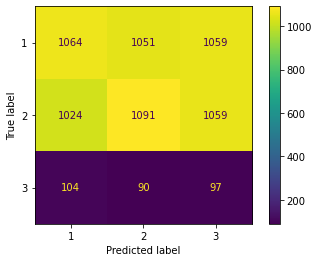

In [63]:
confusion_and_metrics(dummy, X_test_smote, y_test_smote)

## First simple model

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier (random_state = 10)
dt.fit(X_smote, y_smote)
dt.score(X_test_smote, y_test_smote)

0.8927549329718331

In [ ]:
confusion_and_metrics(dt, X_test_smote, y_test_smote)

## Second model

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000,multi_class='multinomial', solver='lbfgs')
model.fit(X_smote, y_smote)
model.score(X_test_smote, y_test_smote)

0.5118240698900437

In [ ]:
confusion_and_metrics(model, X_test_smote, y_test_smote)

In [ ]:
y_smote.value_counts()